# **Obtaining and Loading the Data**

California Housing Dataset

**Required Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Adding the dataset**

In [2]:
housing_data = pd.read_csv('/content/housing.csv')

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Visualization of the Data**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

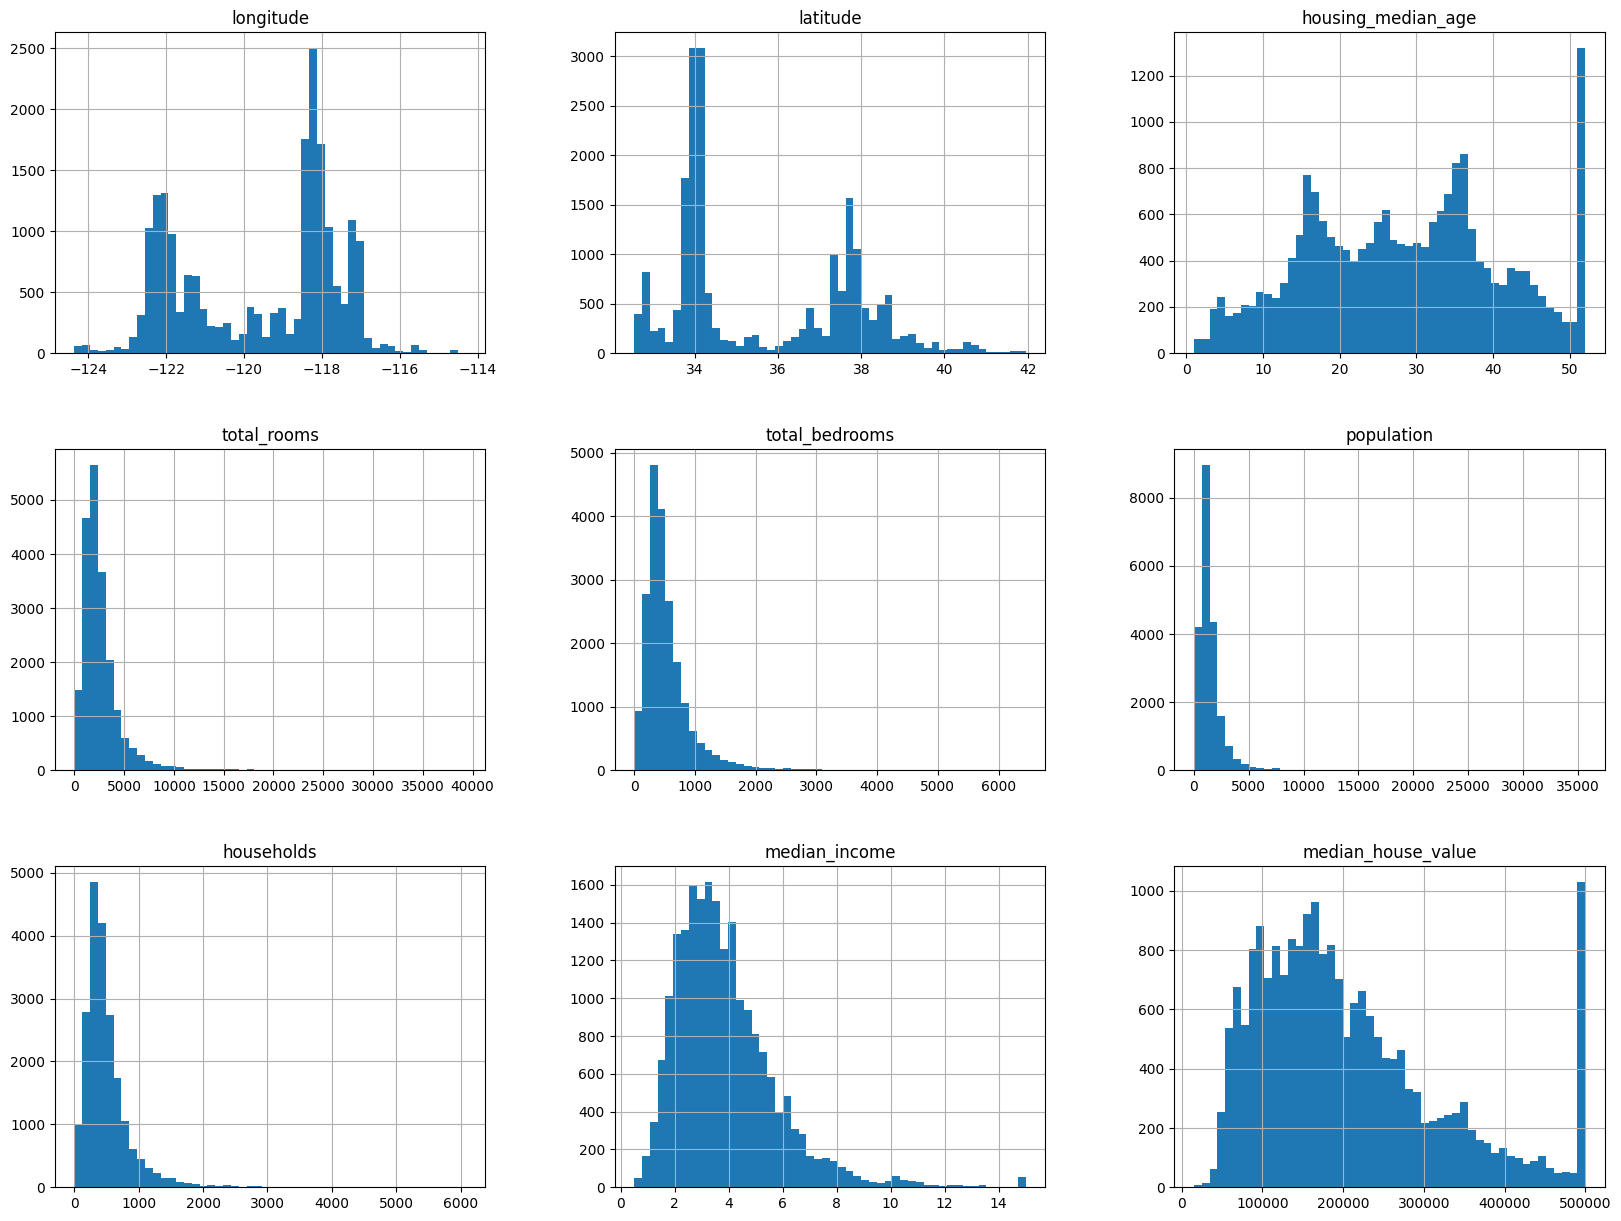

In [4]:
housing_data.hist(bins=50, figsize=(20,15))

#bins parameter is the size of each bar in the histogram

In [5]:
#There is an outlier at the end of the graph in the median_house_value^

**Determining if there is any correlation between the data values**

In [6]:
corr = housing_data.corr()
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

<ipython-input-6-99725c4ca68a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing_data.corr()


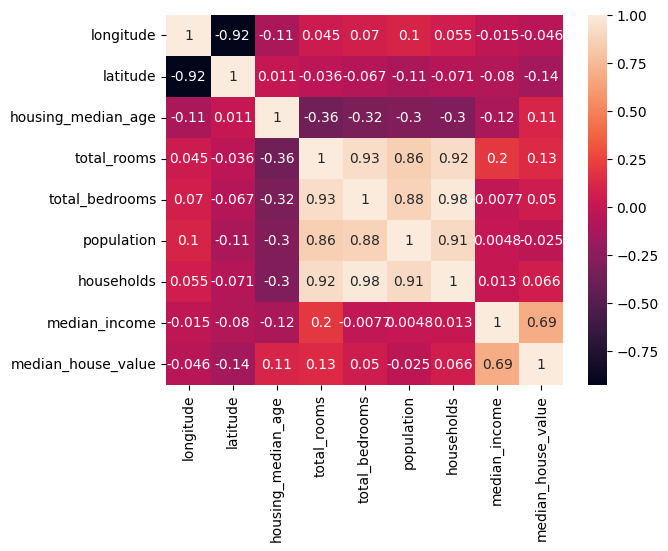

In [7]:
#Plotting the correlation in the form of Heat Map

plt.plot(figsize=(20,15))
sns.heatmap(corr, annot=True)

plt.show()

In [8]:
#The goal of this is to remove closely related datas in order to improve the process of training

**Data Preprocessing**

In [9]:
#Checking for Number of NaN values
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Handling the Missing Data

In [10]:
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].mean())

In [11]:
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
#Combining datas that are related to each other based on the heat map (Need to make sure there isnt more than one pink shade in each row)

housing_data['rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']
housing_data['bedrooms_per_room'] = housing_data['total_bedrooms'] / housing_data['total_rooms']
housing_data['population_per_household'] = housing_data['population'] / housing_data['households']
housing_data['coordinates'] = housing_data['longitude'] / housing_data['latitude']

In [13]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coordinates               20640 non-null  float64
dtypes: flo

In [14]:
housing_data = housing_data.drop('total_rooms' ,  axis=1)
housing_data = housing_data.drop('total_bedrooms' ,  axis=1)
housing_data = housing_data.drop('households' ,  axis=1)
housing_data = housing_data.drop('population' ,  axis=1)
housing_data = housing_data.drop('longitude' ,  axis=1)
housing_data = housing_data.drop('latitude' ,  axis=1)

In [15]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coordinates               20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [16]:
#Checking the correlations along with the heat maps

corr_new = housing_data.corr()
print(corr_new)

                          housing_median_age  median_income  \
housing_median_age                  1.000000      -0.119034   
median_income                      -0.119034       1.000000   
median_house_value                  0.105623       0.688075   
rooms_per_household                -0.153277       0.326895   
bedrooms_per_room                   0.130709      -0.511031   
population_per_household            0.013191       0.018766   
coordinates                        -0.019926      -0.107148   

                          median_house_value  rooms_per_household  \
housing_median_age                  0.105623            -0.153277   
median_income                       0.688075             0.326895   
median_house_value                  1.000000             0.151948   
rooms_per_household                 0.151948             1.000000   
bedrooms_per_room                  -0.220049            -0.347501   
population_per_household           -0.023737            -0.004852   
coordinates 

<ipython-input-16-ba1b77cdcc67>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_new = housing_data.corr()


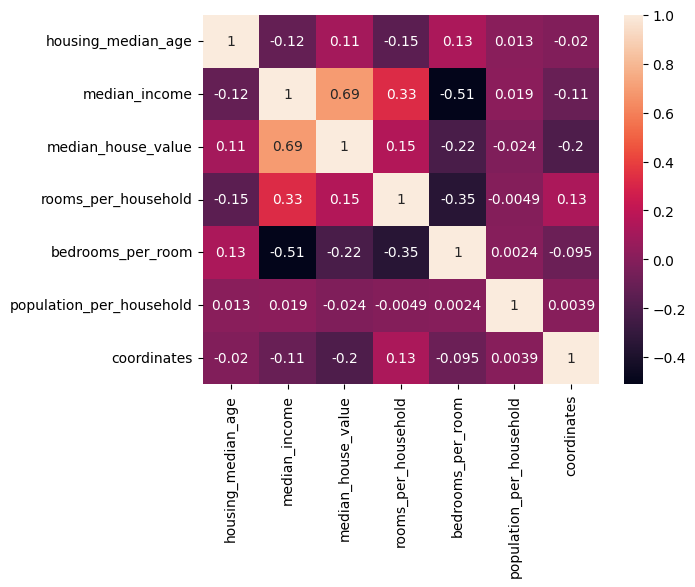

In [17]:
plt.plot(figsize=(15,20))
sns.heatmap(corr_new , annot=True)

plt.show()

In [18]:
#Now we need to deal with the data column containing string vales, which in this case in the ocean_proximity column
#Therefore we use one hot encoder to convert it into int

In [19]:
housing_data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [20]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [21]:
#Using the get_dummies() method from the pandas library
print(pd.get_dummies(data = housing_data['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20640 rows x 5 columns]


In [22]:
housing_data_encoded = pd.get_dummies(data = housing_data, columns = ['ocean_proximity'])

In [23]:
housing_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   median_income               20640 non-null  float64
 2   median_house_value          20640 non-null  float64
 3   rooms_per_household         20640 non-null  float64
 4   bedrooms_per_room           20640 non-null  float64
 5   population_per_household    20640 non-null  float64
 6   coordinates                 20640 non-null  float64
 7   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 8   ocean_proximity_INLAND      20640 non-null  uint8  
 9   ocean_proximity_ISLAND      20640 non-null  uint8  
 10  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 11  ocean_proximity_NEAR OCEAN  20640 non-null  uint8  
dtypes: float64(7), uint8(5)
memory usage: 1.2 MB


**Training the Model**

In [24]:
import sklearn
from sklearn.model_selection import train_test_split

# removing spaces from column names and converting all to lowercase and remove special characters
housing_data_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in housing_data_encoded.columns]

# Split target variable and feature variables
X = housing_data_encoded[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coordinates','ocean_proximity__1h_ocean',
                        'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = housing_data_encoded['median_house_value']

print(X)

       housing_median_age  median_income  bedrooms_per_room  \
0                    41.0         8.3252           0.146591   
1                    21.0         8.3014           0.155797   
2                    52.0         7.2574           0.129516   
3                    52.0         5.6431           0.184458   
4                    52.0         3.8462           0.172096   
...                   ...            ...                ...   
20635                25.0         1.5603           0.224625   
20636                18.0         2.5568           0.215208   
20637                17.0         1.7000           0.215173   
20638                18.0         1.8672           0.219892   
20639                16.0         2.3886           0.221185   

       population_per_household  coordinates  ocean_proximity__1h_ocean  \
0                      2.555556    -3.226769                          0   
1                      2.109842    -3.228209                          0   
2                 

**Spliting Data into Training and Testing**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

#Using 70% of the data for training and 30% for testing

Using Linear Regression

In [37]:
# Using scikit-learn’s LinearRegression to train the model on both the training and evaluate it on the test sets
from sklearn.linear_model import LinearRegression

# Create a Linear regressor using all the feature variables
reg_model = LinearRegression()

# Train the model using the training sets
reg_model.fit(X_train, y_train)

LinearRegression()

In [39]:
#run the predictions on the training and testing data
y_pred_test = reg_model.predict(X_test)

Evaluating the model

In [40]:
#compare the actual values (ie, target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

pred_test_df

,Actual,Predicted
20046,47700.0,103743.050896
3024,45800.0,92451.250932
15663,500001.0,219490.963844
20484,218600.0,283292.425471
9814,278000.0,244228.861575
...,...,...
17505,237500.0,210121.340663
13512,67300.0,74907.098235
10842,218400.0,216609.962950
16559,119400.0,127975.072923


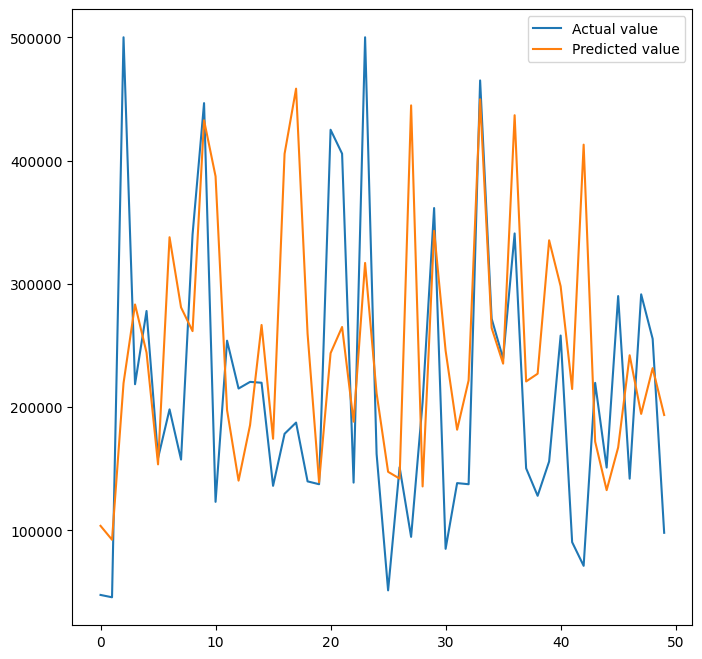

In [41]:
fig= plt.figure(figsize=(8,8))
pred_test_df = pred_test_df.reset_index()
pred_test_df = pred_test_df.drop(['index'],axis=1)
plt.plot(pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [42]:
# Determine accuracy uisng 𝑅^2
r2_reg_model_test = round(reg_model.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 0.56


**Since the score is not great we tried another method i.e. XGBoost Model Training**

In [30]:
!pip install xgboost

In [31]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

In [32]:
# Train the model using the training sets
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Running the pred and evaluating the model

In [33]:
y_xgb_pred_test = xgb_model.predict(X_test)

In [34]:
#compare the actual values (ie, target) with the values predicted by the model
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})

xgb_pred_test_df

,Actual,Predicted
20046,47700.0,55489.585938
3024,45800.0,91305.289062
15663,500001.0,427575.593750
20484,218600.0,248626.375000
9814,278000.0,219503.578125
...,...,...
17505,237500.0,232643.968750
13512,67300.0,68681.859375
10842,218400.0,225466.093750
16559,119400.0,126241.585938


Plotting it in the form of a graph

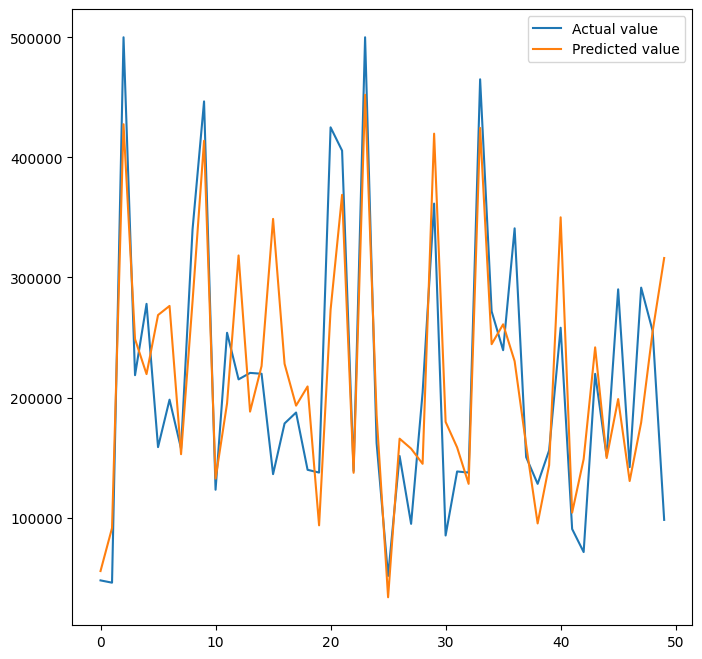

In [35]:
fig= plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [36]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_xgb_pred_test)

print("R^2 - {}%".format(round(score, 2) *100))

R^2 - 77.0%


# **A much better accuracy has been obtianed using XGBoost**